In [25]:

import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd 
import numpy as np 
import matplotlib

import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [27]:
df = pd.read_csv('../../datasets/diabetes_dropped_imputed_encoded.csv')

In [28]:
df

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,diabetic
0,0,203.0,27,56.0,3.6,4.310000,0,27,0,62.0,121.0,1,118.0,59.0,152.382979,92.524823,29.0,38.0,720.0,1.5748,48.790420,0.763158,0
1,1,165.0,42,24.0,6.9,4.440000,0,10,0,64.0,218.0,0,112.0,68.0,152.382979,92.524823,46.0,48.0,360.0,1.6256,82.495282,0.958333,0
2,2,228.0,37,37.0,6.2,4.640000,0,39,0,61.0,256.0,0,190.0,92.0,185.000000,92.000000,49.0,57.0,180.0,1.5494,106.638214,0.859649,0
3,3,78.0,38,12.0,6.5,4.630000,0,48,1,67.0,119.0,0,110.0,50.0,152.382979,92.524823,33.0,38.0,480.0,1.7018,41.089412,0.868421,0
4,4,249.0,35,28.0,8.9,7.720000,0,45,1,68.0,183.0,1,138.0,80.0,152.382979,92.524823,44.0,41.0,300.0,1.7272,61.343116,1.073171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,398,296.0,113,46.0,6.4,16.110001,1,34,1,69.0,173.0,1,138.0,94.0,130.000000,94.000000,35.0,39.0,210.0,1.7526,56.322314,0.897436,1
399,399,284.0,34,54.0,5.3,4.390000,1,32,0,63.0,154.0,1,140.0,100.0,146.000000,102.000000,32.0,43.0,180.0,1.6002,60.141214,0.744186,0
400,400,194.0,105,38.0,5.1,13.630000,1,10,0,69.0,167.0,2,120.0,70.0,152.382979,92.524823,33.0,40.0,20.0,1.7526,54.368939,0.825000,1
401,401,199.0,21,52.0,3.8,4.490000,1,22,0,63.0,197.0,1,120.0,78.0,152.382979,92.524823,41.0,48.0,255.0,1.6002,76.933890,0.854167,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               403 non-null    int64  
 1   chol             403 non-null    float64
 2   stab.glu         403 non-null    int64  
 3   hdl              403 non-null    float64
 4   ratio            403 non-null    float64
 5   glyhb            403 non-null    float64
 6   location         403 non-null    int64  
 7   age              403 non-null    int64  
 8   gender           403 non-null    int64  
 9   height           403 non-null    float64
 10  weight           403 non-null    float64
 11  frame            403 non-null    int64  
 12  bp.1s            403 non-null    float64
 13  bp.1d            403 non-null    float64
 14  bp.2s            403 non-null    float64
 15  bp.2d            403 non-null    float64
 16  waist            403 non-null    float64
 17  hip             

In [30]:
df.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio', 'diabetic'],
      dtype='object')

In [31]:
train_cols = ['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio']

x = df[train_cols]
y = df['diabetic']

In [32]:
x

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio
0,203.0,27,56.0,3.6,4.310000,0,27,0,62.0,121.0,1,118.0,59.0,152.382979,92.524823,29.0,38.0,720.0,1.5748,48.790420,0.763158
1,165.0,42,24.0,6.9,4.440000,0,10,0,64.0,218.0,0,112.0,68.0,152.382979,92.524823,46.0,48.0,360.0,1.6256,82.495282,0.958333
2,228.0,37,37.0,6.2,4.640000,0,39,0,61.0,256.0,0,190.0,92.0,185.000000,92.000000,49.0,57.0,180.0,1.5494,106.638214,0.859649
3,78.0,38,12.0,6.5,4.630000,0,48,1,67.0,119.0,0,110.0,50.0,152.382979,92.524823,33.0,38.0,480.0,1.7018,41.089412,0.868421
4,249.0,35,28.0,8.9,7.720000,0,45,1,68.0,183.0,1,138.0,80.0,152.382979,92.524823,44.0,41.0,300.0,1.7272,61.343116,1.073171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,113,46.0,6.4,16.110001,1,34,1,69.0,173.0,1,138.0,94.0,130.000000,94.000000,35.0,39.0,210.0,1.7526,56.322314,0.897436
399,284.0,34,54.0,5.3,4.390000,1,32,0,63.0,154.0,1,140.0,100.0,146.000000,102.000000,32.0,43.0,180.0,1.6002,60.141214,0.744186
400,194.0,105,38.0,5.1,13.630000,1,10,0,69.0,167.0,2,120.0,70.0,152.382979,92.524823,33.0,40.0,20.0,1.7526,54.368939,0.825000
401,199.0,21,52.0,3.8,4.490000,1,22,0,63.0,197.0,1,120.0,78.0,152.382979,92.524823,41.0,48.0,255.0,1.6002,76.933890,0.854167


In [33]:
y

0      0
1      0
2      0
3      0
4      1
      ..
398    1
399    0
400    1
401    0
402    1
Name: diabetic, Length: 403, dtype: int64

RANDOMM FOREST TRAINING

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)


In [35]:
x_train

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio
99,224.0,111,33.0,6.8,10.15,1,46,1,67.0,197.0,1,160.0,80.0,158.000000,80.000000,42.0,43.0,390.0,1.7018,68.021967,0.976744
314,245.0,62,26.0,9.4,7.51,1,17,1,66.0,179.0,0,150.0,92.0,130.000000,86.000000,37.0,42.0,390.0,1.6764,63.693883,0.880952
259,224.0,30,30.0,7.5,5.26,0,17,1,69.0,205.0,1,150.0,99.0,130.000000,80.000000,37.0,41.0,360.0,1.7526,66.740314,0.902439
397,301.0,35,118.0,2.6,4.28,1,65,0,61.0,115.0,1,218.0,90.0,238.000000,90.000000,31.0,41.0,210.0,1.5494,47.903885,0.756098
176,193.0,100,24.0,8.0,7.14,0,40,0,66.0,189.0,1,140.0,90.0,152.382979,92.524823,38.0,45.0,90.0,1.6764,67.252201,0.844444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,244.0,34,92.0,2.7,4.54,1,2,1,71.0,163.0,1,116.0,76.0,152.382979,92.524823,34.0,39.0,180.0,1.8034,50.119124,0.871795
390,196.0,63,67.0,2.9,9.37,1,33,0,62.0,147.0,1,144.0,94.0,142.000000,92.000000,34.0,42.0,480.0,1.5748,59.274312,0.809524
143,219.0,57,73.0,3.0,9.18,0,40,1,66.0,170.0,1,146.0,92.0,168.000000,98.000000,37.0,40.0,120.0,1.6764,60.491397,0.925000
241,242.0,19,55.0,4.4,3.97,0,51,0,66.0,200.0,1,140.0,65.0,152.382979,92.524823,41.0,47.0,180.0,1.6764,71.166350,0.872340


In [36]:
forest_model  = RandomForestClassifier(n_jobs=-1, random_state=42)

In [37]:
%%time 
forest_model.fit(x_train, y_train)

Wall time: 1.36 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [38]:
forest_model.score(x_train, y_train)

1.0

In [39]:
forest_train_probability = forest_model.predict_proba(x_train)
forest_train_probability

array([[0.02, 0.98],
       [0.05, 0.95],
       [0.84, 0.16],
       [0.96, 0.04],
       [0.21, 0.79],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.86, 0.14],
       [0.11, 0.89],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.9 , 0.1 ],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.41, 0.59],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.1 , 0.9 ],
       [0.94, 0.06],
       [0.05, 0.95],
       [0.39, 0.61],
       [0.98, 0.02],
       [0.06, 0.94],
       [0.25, 0.75],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.81, 0.19],
       [0.96, 0.04],
       [0.99,

In [40]:
forest_model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [41]:
len(forest_model.estimators_)

100

In [42]:
forest_importance_df = pd.DataFrame({
    'feature' : x_train.columns, 
    'importance' : forest_model.feature_importances_
}).sort_values('importance', ascending=False)

In [43]:
forest_importance_df.head(10)

,feature,importance
4,glyhb,0.455213
1,stab.glu,0.158352
0,chol,0.041632
6,age,0.035471
3,ratio,0.029605
11,bp.1s,0.027448
2,hdl,0.025463
12,bp.1d,0.025407
14,bp.2d,0.025387
17,time.ppn,0.021843


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

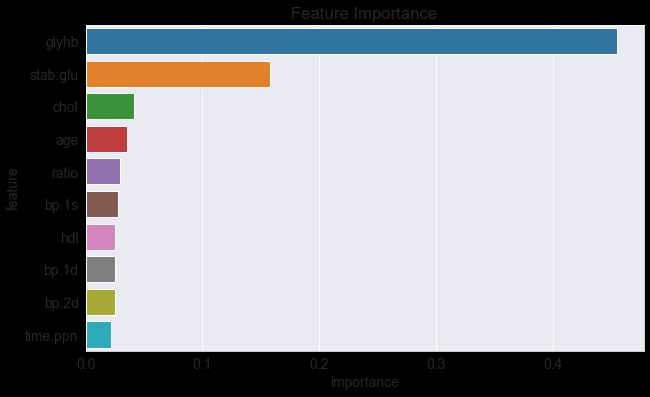

In [44]:
plt.title('Feature Importance')
sns.barplot(data=forest_importance_df.head(10), x='importance', y='feature')

In [45]:
base_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train, y_train)

In [46]:
base_train_accuracy = base_forest_model.score(x_train, y_train)

In [47]:
base_accuracy = base_train_accuracy
base_accuracy

1.0

In [48]:
forest_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10).fit(x_train, y_train)

In [49]:
forest_model_1.score(x_train, y_train)

0.9929078014184397

In [50]:
forest_model_2 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(x_train, y_train)


In [51]:
forest_model_2.score(x_train, y_train)

1.0

In [54]:
def estimator_no_error(est):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=est)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'No. of Estimators' : est, 
        'Training Error' : forest_train_accuracy
        }

In [55]:
%%time
forest_error_df = pd.DataFrame([estimator_no_error(est) for est in range(1, 10)])

Wall time: 1.23 s


In [56]:
forest_error_df

,No. of Estimators,Training Error
0,1,0.060284
1,2,0.056738
2,3,0.021277
3,4,0.021277
4,5,0.007092
5,6,0.010638
6,7,0.007092
7,8,0.010638
8,9,0.007092


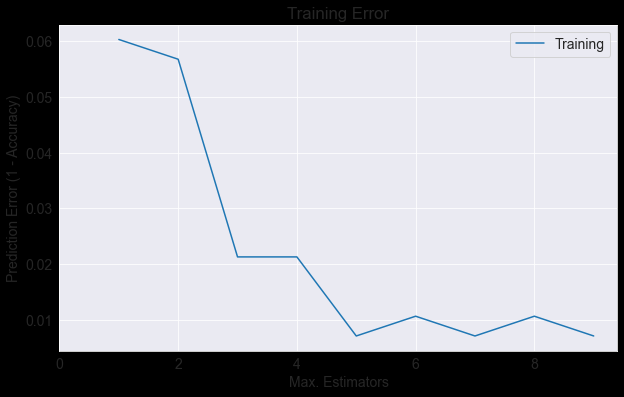

In [57]:
plt.figure()
plt.plot(forest_error_df['No. of Estimators'], forest_error_df['Training Error'])

plt.title('Training Error')

plt.xticks(range(0,10,2))

plt.xlabel('Max. Estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')

plt.legend(['Training'])

In [58]:
def test_params(**params):
    rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    return rf_model.score(x_train, y_train)

In [59]:
test_params(max_depth=5)

0.9716312056737588

In [60]:
test_params(max_depth=26)

1.0

In [63]:
def depth_max(dm):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=dm)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max depth' : dm, 
        'Training Error' : forest_train_accuracy
        }

In [66]:
%%time
max_depth_df = pd.DataFrame([depth_max(dm) for dm in range(1, 10)])

Wall time: 12.8 s


In [67]:
max_depth_df

,Max depth,Training Error
0,1,0.106383
1,2,0.042553
2,3,0.035461
3,4,0.035461
4,5,0.028369
5,6,0.021277
6,7,0.007092
7,8,0.000000
8,9,0.000000


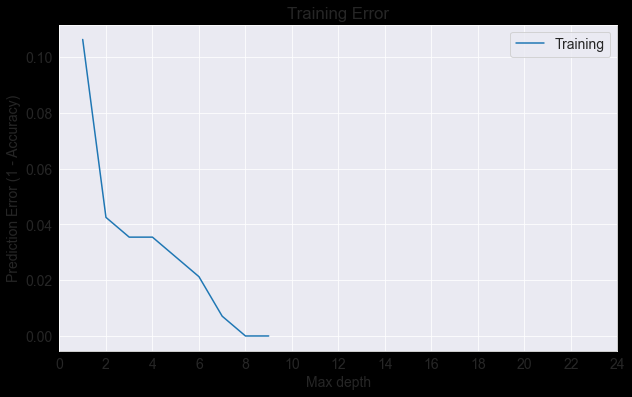

In [68]:
plt.figure()
plt.plot(max_depth_df['Max depth'], max_depth_df['Training Error'])

plt.title('Training Error')
plt.xticks(range(0,26,2))
plt.xlabel('Max depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training'])

In [69]:
test_params(max_leaf_nodes= 2**5)

1.0

In [70]:
test_params(max_leaf_nodes= 2**20)

1.0

In [71]:
base_accuracy

1.0

In [72]:
def max_leaf(ml):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_leaf_nodes=ml)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max leaf_nodes' : ml, 
        'Training Error' : forest_train_accuracy
        }

In [75]:
%%time
max_leaf_df = pd.DataFrame([max_leaf(ml) for ml in range(2, 20)])

Wall time: 30.9 s


In [76]:
max_leaf_df

,Max leaf_nodes,Training Error
0,2,0.106383
1,3,0.046099
2,4,0.035461
3,5,0.035461
4,6,0.035461
5,7,0.035461
6,8,0.035461
7,9,0.031915
8,10,0.031915
9,11,0.028369


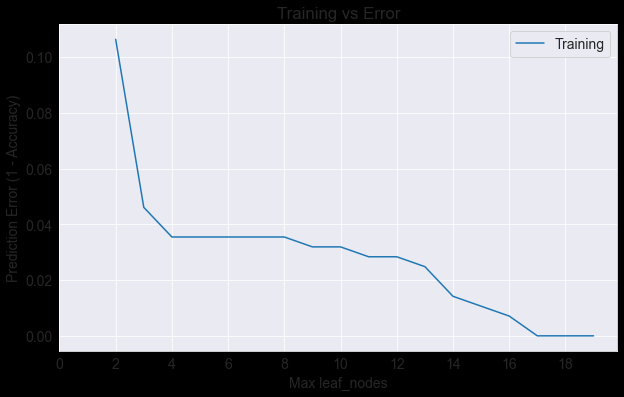

In [77]:
plt.figure()
plt.plot(max_leaf_df['Max leaf_nodes'], max_leaf_df['Training Error'])

plt.title('Training vs Error')
plt.xticks(range(0,20,2))
plt.xlabel('Max leaf_nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training'])

In [78]:
test_params(max_features='log2')

1.0

In [79]:
test_params(max_features=3)

1.0

In [80]:
def features_max(mf):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=mf)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max features' : mf, 
        'Training Error' : forest_train_accuracy
        }

In [81]:
max_leaf_df = pd.DataFrame([features_max('log2')])

In [82]:
max_leaf_df

,Max features,Training Error
0,log2,0.0


In [83]:
max_leaf_df = pd.DataFrame([features_max('sqrt')])

In [84]:
max_leaf_df

,Max features,Training Error
0,sqrt,0.0


In [85]:
max_leaf_df = pd.DataFrame([features_max('auto')])

In [86]:
max_leaf_df

,Max features,Training Error
0,auto,0.0


In [87]:
max_leaf_df = pd.DataFrame([features_max(None)])

In [88]:
max_leaf_df

,Max features,Training Error
0,None,0.0


In [89]:
test_params(min_samples_split=3, min_samples_leaf=2)

0.9929078014184397

In [116]:
test_params(min_samples_split=20, min_samples_leaf=14)

0.9609929078014184

In [91]:
test_params(min_impurity_decrease=1e-7)

1.0

In [92]:
test_params(min_impurity_decrease=1e-5)

1.0

In [93]:
test_params(bootstrap=False)

1.0

In [94]:
test_params(bootstrap=True, max_samples=0.9)

1.0

In [117]:
final_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=10,
    max_features='auto',
    max_depth=5,
    max_leaf_nodes=12,
    min_samples_split=20, 
    min_samples_leaf=14,
    class_weight={1 : 1, 0 : 1.5}
)

In [118]:
final_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1.5, 1: 1}, max_depth=5,
                       max_leaf_nodes=12, min_samples_leaf=14,
                       min_samples_split=20, n_estimators=10, random_state=42)

In [119]:
final_rf.score(x_train, y_train)

0.9397163120567376

In [120]:
def predict_discrete (final_rf, single_input):
    input_df = pd.DataFrame([single_input])
    #input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    #input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    #input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

    x_input = input_df
    predictions = final_rf.predict(x_input)[0]
    probability = final_rf.predict_proba(x_input)[0][list(final_rf.classes_).index(predictions)]

    return predictions, probability

In [121]:
df.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio', 'diabetic'],
      dtype='object')

In [122]:
new_input = {'chol': 203,
             'stab.glu' : 27,
             'hdl' : 56,
             'ratio': 3.6,
             'glyhb': 4.31,
             'location' : 0,
             'age': 27,
            'gender': 0,
            'height': 62,
            'weight': 121,
            'frame': 1,
            'bp.1s': 118,
            'bp.1d': 59,
            'bp.2s': 152.38,
       'bp.2d': 92.52,
       'waist': 29,
       'hip': 38, 
       'time.ppn': 720, 
       'height_meters': 1.57,
       'BMI': 49.79,
       'hip_waist_ratio': 0.76
       }

In [123]:
predict_discrete(final_rf, new_input)

(0, 0.9859477124183007)

import pickle
filename = 'australian_rain.sav'
pickle.dump(final_rf, open(filename, 'wb'))